In [1]:
import pandas as pd
import pickle
import time, os

from bs4 import BeautifulSoup
import requests

import re

import random

print('Libraries imported')

all_page_list = []




Libraries imported


In [2]:
with open('all_item_list.pkl', 'rb') as input:
    all_items_list = pickle.load(input)

In [2]:
#This header is to bypass CAPCHA
header = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

#Dataframe headers
df_headers = ["Name", "Description", "Category", "Country", "Alcohol_Vol", "Review", "Style",
             "Aroma", "Flavor", "Sweetness", "Bitterness", "Enjoy", "Pairing", "Cocktails", 
             "Bottom_Line", "Points", "Price"]


root_url = 'https://www.totalwine.com'


### Get all page_links

In [4]:

#Lastest review
page_url = 'https://www.tastings.com/Reviews/Latest-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")
for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)

print('Now we have {} links'.format(len(all_page_list)))

Now we have 95 links


In [41]:

root_page = 'https://www.totalwine.com/spirits/c/c0030?&page={}&pageSize=100&aty=1,1,1,1'

In [48]:
for num_page in range(38,102):
    
    page_link = root_page.format(num_page)
    
    response = requests.get(page_link, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")

    for i in range(100):
            try:
                all_items_list.append(root_url + soup.find_all(class_='titleRatingsHolder__1TZlqhxF')[i]('a')[0]['href'])
            except:
                pass

    time.sleep(2)

In [175]:
len(all_items_list)

NameError: name 'all_items_list' is not defined

In [51]:
with open('items_list_liquor_total_wine.pkl', 'wb') as wf:
    pickle.dump(all_items_list, wf)

In [3]:
response = requests.get('https://www.totalwine.com/spirits/american-whiskey/rye-whiskey/wild-turkey-rye-81/p/123632750?s=1406&igrules=true', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

soup

<!DOCTYPE html>
 <html lang="en"> <head> <meta charset="utf-8"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Total Wine &amp; More - Access to this page has been denied.</title> <link href="https://fonts.googleapis.com/css?family=Roboto&amp;display=swap" rel="stylesheet"/> <style> html, body { margin: 0; padding: 0; font-family: 'Roboto', sans-serif; color: #000; } a { color: #c5c5c5; text-decoration: none; } .container { align-items: center; display: flex; flex: 1; justify-content: space-between; flex-direction: column; height: 100%; } .container > div { width: 100%; display: flex; justify-content: center; } .container > div > div { display: flex; width: 80%; } .customer-logo-wrapper { padding: 0px; background-color: #811F08; } .customer-logo { padding: 16px 0px 16px 0px; } .page-title-wrapper { flex-grow: 2; } .page-title { flex-direction: column-reverse; } .content-wrapper { flex-grow: 5; } .content { flex-direction: column; } .page-footer-wrapper { 

In [15]:
all_items_caskers = []
root_url = 'https://www.caskers.com/spirits/?p={}&product_list_limit=80'

In [ ]:
for num_page in range(1,41):
    
    page_link = root_url.format(num_page)
    
    response = requests.get(page_link, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")

    for i in range(80):
            try:
                all_items_caskers.append(soup.find_all(class_='product-item-info')[i]('a')[0]['href'])
            except:
                pass

    time.sleep(10)

In [13]:
page_link = root_url.format(2)

response = requests.get(page_link, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(80):
        try:
            all_items_caskers.append(soup.find_all(class_='product-item-info')[i]('a')[0]['href'])
        except:
            pass

In [11]:
soup.find_all(class_='product-item-info')[3]('a')[0]['href']

'https://www.caskers.com/bootlegger-new-york-crarft-vodka/'

88

In [5]:
#2020 Review

page_url = 'https://www.tastings.com/Reviews/2020-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)
    
print('Now we have {} links'.format(len(all_page_list)))

Now we have 192 links


In [6]:
#2019 Review

page_url = 'https://www.tastings.com/Reviews/2019-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)
    
print('Now we have {} links'.format(len(all_page_list)))

Now we have 292 links


In [7]:
#2018 Review

page_url = 'https://www.tastings.com/Reviews/2018-Spirits-Wine-Beer-Reviews.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

for i in range(len(soup.find_all(class_='m-content-link-bold m-content-link-font-q'))):
    
    url = soup.find_all(class_='m-content-link-bold m-content-link-font-q')[i]['href']
    all_page_list.append(root_url+url)
    
print('Now we have {} links'.format(len(all_page_list)))

Now we have 390 links


### Get all items_links

In [8]:
page_url = 'https://www.tastings.com/Calendar-Spirits/Review-2021-05-01-Agave.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [9]:
soup.find_all(class_='m-preview-title-1')[0].find('a')['href']

'/Spirits-Review/Mezcal-de-Leyendas-Verde-San-Luis-Potosi-Mezcal-Mexico-90-Proof-05-01-2021.aspx'

In [10]:
# #Get all items_links
# all_items_list = []

# for url in all_page_list:
    
#     response = requests.get(url, headers=header)

#     data = response.text

#     soup = BeautifulSoup(data, "html.parser")

#     for i in range(len(soup.find_all(class_='m-preview-title-1'))):
    
#         item_url = soup.find_all(class_='m-preview-title-1')[i].find('a')['href']
        
#         all_items_list.append(root_url+item_url)

    
# print('Now we have {} items to scrape!'.format(len(all_items_list)))

In [11]:
all_items_list[:10]

['https://www.tastings.com/Spirits-Review/Mezcal-de-Leyendas-Verde-San-Luis-Potosi-Mezcal-Mexico-90-Proof-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Paradiso-Tequila-Extra-Anejo-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/Peloton-de-la-Muerte-Vegan-Pechuga-Mezcal-Mexico-90-2-Proof-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/1800-Milenio-Extra-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Blanco-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/Mezcal-de-Leyendas-Cenizo-Durango-Mezcal-Mexico-94-Proof-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/El-Tesoro-Extra-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spirits-Review/Jose-Cuervo-Reserva-De-La-Familia-Extra-Anejo-Tequila-Mexico-05-01-2021.aspx',
 'https://www.tastings.com/Spiri

### Get all items_details

In [75]:
items_list = []

page_url = 'https://www.tastings.com/Wine-Review/Celebrities-2018-Syrah-Carinena-Spain-11-08-2020.aspx'

response = requests.get(page_url, headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [13]:
soup.find_all('meta')[2]['content'] #name

'Celebrities 2018 Syrah Carinena Spain Wine Review | Tastings'

In [14]:
soup.find_all('meta')[4]['content'] #description

'Celebrities Review Syrah 2018 Spain Spanish Wine Cariñena Syrah 233202 Red Wine Tasting Note Flavor Description Fruity Juicy & Smooth & Rich & Full Smooth Dryish Moderate Oak Interesting blackberry reduction sassafras dried figs and dates and black olives Same as aromas with notes of hints of roasted meats A bold chewy Syrah that will stand up to rich beefy dishes Silver Medal November 2020 Rating $10.99 88 Points Moderate Price Affordable Economical Gregory Vine Best Buy Best Buy Good Value'

In [27]:
soup.find_all(class_='m-review-center-info-text')[0].find('h3').text.split('\r\n')[1].strip() #categories

'Syrah'

In [35]:
soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[1].text.strip().split('\r\n')[1].strip() #country

'Spain'

In [36]:
soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[2].text.strip().split('\r\n')[1].strip() #alcohol vol

'14.5%'

In [41]:
soup.find(class_='m-review-testimonials-text').text.strip() #review_text

'Black garnet color. Fruity aromas and flavors of blackberry reduction, sassafras, dried figs and dates, and black olives with a slightly chewy, vibrant, dryish medium-full body and a silky, appealing, medium-long finish displaying notes of hints of roasted meats with moderate oak flavor. A bold, chewy Syrah that will stand up to rich, beefy dishes.'

In [56]:
soup.find(id='ctl00_ContentMain_rowStyle').find(class_='m-review-tastings-notes-cell-value').text.strip() #Style

'Fruity, Juicy & Smooth & Rich & Full'

In [57]:
soup.find(id='ctl00_ContentMain_rowAroma').find(class_='m-review-tastings-notes-cell-value').text.strip() #Aroma

'blackberry reduction, sassafras, dried figs and dates, and black olives'

In [58]:
soup.find(id='ctl00_ContentMain_rowFlavor').find(class_='m-review-tastings-notes-cell-value').text.strip() #Flavor

'Same as aromas with notes of hints of roasted meats'

In [60]:
soup.find(id='ctl00_ContentMain_rowSweetness').find(class_='m-review-tastings-notes-cell-value').text.strip() #Sweetness

'Dryish'

In [73]:
soup.find(id='ctl00_ContentMain_rowBitterness').find(class_='m-review-tastings-notes-cell-value').text.strip() #Bitterness

AttributeError: 'NoneType' object has no attribute 'find'

In [62]:
soup.find(id='ctl00_ContentMain_rowEnjoy').find(class_='m-review-tastings-notes-cell-value').text.strip() #Enjoy

'Now on its own and with food'

In [63]:
soup.find(id='ctl00_ContentMain_rowPairing').find(class_='m-review-tastings-notes-cell-value').text.strip() #Pairing

'Peking Duck, Lamb Tagine, Souvlaki'

In [72]:
soup.find(id='ctl00_ContentMain_rowCocktails').find(class_='m-review-tastings-notes-cell-value').text.strip() #Cocktails

AttributeError: 'NoneType' object has no attribute 'find'

In [65]:
soup.find(id='ctl00_ContentMain_rowBottomLine').find(class_='m-review-tastings-notes-cell-value').text.strip() #Bottom Line

'A bold, chewy Syrah that will stand up to rich, beefy dishes.'

In [68]:
soup.find(class_='m-review-medal-points-q').text.strip() #points

'88 Points'

In [69]:
soup.find(id='ctl00_ContentMain_divPrice').text.strip() #Price

'$10.99'

### Scrape

In [76]:
import numpy as np

In [90]:
def get_drink_features(url):
    
    features_list = []
    
    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")
    
    
    try:
        name = soup.find_all('meta')[2]['content']
    except:
        name = np.nan
    
    
    try:
        description = soup.find_all('meta')[4]['content']
    except:
        description = np.nan
    
    try:
        category = soup.find_all(class_='m-review-center-info-text')[0].find('h3').text.split('\r\n')[1].strip()
    except:
        category = np.nan
        
    try:
        country = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[1].text.strip().split('\r\n')[1].strip()
    except:
        country = np.nan
    
    try:
        alc_vol = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[2].text.strip().split('\r\n')[1].strip()
    except:
        alc_vol = np.nan
        
        
    try:
        review = soup.find(class_='m-review-testimonials-text').text.strip()
    except:
        review = np.nan
        
    try:
        style = soup.find(id='ctl00_ContentMain_rowStyle').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        style = np.nan
        
    try:
        aroma = soup.find(id='ctl00_ContentMain_rowAroma').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        aroma = np.nan
        
    try:
        flavor = soup.find(id='ctl00_ContentMain_rowFlavor').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        flavor = np.nan
        
    try:
        sweetness = soup.find(id='ctl00_ContentMain_rowSweetness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        sweetness = np.nan
        
    try:
        bitterness = soup.find(id='ctl00_ContentMain_rowBitterness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bitterness = np.nan
        
    try:
        enjoy = soup.find(id='ctl00_ContentMain_rowEnjoy').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        enjoy = np.nan
        
    try:
        pairing = soup.find(id='ctl00_ContentMain_rowPairing').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        pairing = np.nan
        
    try:
        cocktails = soup.find(id='ctl00_ContentMain_rowCocktails').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        cocktails = np.nan
        
    try:
        bot_line = soup.find(id='ctl00_ContentMain_rowBottomLine').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bot_line = np.nan
        
    try:
        point = soup.find(class_='m-review-medal-points-q').text.strip()
    except:
        point = np.nan
        
    try:
        price = soup.find(id='ctl00_ContentMain_divPrice').text.strip()
    except:
        price = np.nan
        
        
    #Put all features in a dictionary
    drink_dict = dict(zip(df_headers, [name,
                                      description,
                                      category,
                                      country,
                                      alc_vol,
                                      review,
                                      style,
                                      aroma,
                                      flavor,
                                      sweetness,
                                      bitterness,
                                      enjoy,
                                      pairing,
                                      cocktails,
                                      bot_line,
                                      point,
                                      price]))
    
    features_list = features_list.append(drink_dict)
    
    return features_list
    

In [92]:
features_list = []

get_drink_features('https://www.tastings.com/Wine-Review/Celebrities-2018-Syrah-Carinena-Spain-11-08-2020.aspx')

features_list

[]

In [4]:
len(all_items_list[7000:])

3522

In [122]:
#Scrape 1000 items

features_list = []

for url in all_items_list[7000:]:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find_all('meta')[2]['content']
    except:
        name = np.nan


    try:
        description = soup.find_all('meta')[4]['content']
    except:
        description = np.nan

    try:
        category = soup.find_all(class_='m-review-center-info-text')[0].find('h3').text.split('\r\n')[1].strip()
    except:
        category = np.nan

    try:
        country = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[1].text.strip().split('\r\n')[1].strip()
    except:
        country = np.nan

    try:
        alc_vol = soup.find_all(class_='m-review-center-info-text')[0].find_all('div')[2].text.strip().split('\r\n')[1].strip()
    except:
        alc_vol = np.nan


    try:
        review = soup.find(class_='m-review-testimonials-text').text.strip()
    except:
        review = np.nan

    try:
        style = soup.find(id='ctl00_ContentMain_rowStyle').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        style = np.nan

    try:
        aroma = soup.find(id='ctl00_ContentMain_rowAroma').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        aroma = np.nan

    try:
        flavor = soup.find(id='ctl00_ContentMain_rowFlavor').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        flavor = np.nan

    try:
        sweetness = soup.find(id='ctl00_ContentMain_rowSweetness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        sweetness = np.nan

    try:
        bitterness = soup.find(id='ctl00_ContentMain_rowBitterness').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bitterness = np.nan

    try:
        enjoy = soup.find(id='ctl00_ContentMain_rowEnjoy').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        enjoy = np.nan

    try:
        pairing = soup.find(id='ctl00_ContentMain_rowPairing').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        pairing = np.nan

    try:
        cocktails = soup.find(id='ctl00_ContentMain_rowCocktails').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        cocktails = np.nan

    try:
        bot_line = soup.find(id='ctl00_ContentMain_rowBottomLine').find(class_='m-review-tastings-notes-cell-value').text.strip()
    except:
        bot_line = np.nan

    try:
        point = soup.find(class_='m-review-medal-points-q').text.strip()
    except:
        point = np.nan

    try:
        price = soup.find(id='ctl00_ContentMain_divPrice').text.strip()
    except:
        price = np.nan


    #Put all features in a dictionary
    drink_dict = dict(zip(df_headers, [name,
                                      description,
                                      category,
                                      country,
                                      alc_vol,
                                      review,
                                      style,
                                      aroma,
                                      flavor,
                                      sweetness,
                                      bitterness,
                                      enjoy,
                                      pairing,
                                      cocktails,
                                      bot_line,
                                      point,
                                      price]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('data/df_1000items_p8_p10.csv')

print('Done!')

Done!


In [5]:
response = requests.get('https://www.tastings.com/Beer-Review/Vancouver-Island-Brewing-Pipers-Pale-Ale-Canada-08-02-2018.aspx', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

In [6]:
soup.find(class_='m-review-left-image-container').find('img')['src'] #photo 127 x 228

'https://www.tastings.com/Product-Images/Beer/2018/8_2_2018/225202_fs.jpg'

In [135]:
soup.find(class_='m-review-catg-desc-text').text.strip() #extend review

'English-style pale ales are pale gold to amber in color and range in alcohol from 4-6%. These beers are characterized by the flavors and aromas of nutty and biscuity English malts, floral and earthy English hops and the notes of fruitiness and faint butterscotch of English yeast. Water also plays a key role in the overall character of these beers. Great examples of this style are brewed with harder water resembling that of Burton-Upon-Trent, lending these beers an impression of dryness in the finish and rounded hop bitterness. Pale ales originated in England over 300 years ago with the advent of new technology making pale barely malt a possibility. In the 19th century, ales that were pale in color were often referred to as pale ale or bitter interchangeably. Today, there is a distinction between these styles, albeit a very fine distinction with some arguing that “bitter” refers to the style dispensed as draft and “pale ale” to the style when bottled. Noteworthy examples of this style 

In [17]:
len(all_items_list)

10522

In [8]:
response = requests.get('https://www.tastings.com/Spirits-Review/Mezcal-de-Leyendas-Verde-San-Luis-Potosi-Mezcal-Mexico-90-Proof-05-01-2021.aspx', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

In [15]:
soup.find(id='ctl00_ContentMain_divBands').text.strip()

'Superlative'

In [18]:
import time, os

In [6]:
#Scrape more reviews and photos
smaller_headers = ["Name", "Photo_Link"]
features_list = []

for url in all_items_list[7000:]:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find_all('meta')[2]['content']
    except:
        name = np.nan


    try:
        photo_link = soup.find(class_='m-review-left-image-container').find('img')['src'] #photo 127 x 228
    except:
        photo_link = np.nan



    #Put all features in a dictionary
    drink_dict = dict(zip(smaller_headers, [name, photo_link]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('tastings_photos_links_4.csv')
time.sleep(60)
print('Done!')

Done!


In [145]:
len(all_items_list)

10522

### More scraping

In [179]:
response = requests.get('https://www.caskers.com/westward-american-single-malt-whiskey/', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

soup

<!DOCTYPE html>

<html lang="en">
<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# product: http://ogp.me/ns/product#">
<link href="https://www.caskers.com/static/version1620198840/_cache/merged/72031697a13e28ea9e121d33d1eed36f.min.css" media="all" rel="stylesheet" type="text/css"/><link href="https://www.caskers.com/static/version1620198840/frontend/BelVG/caskers_theme/en_US/css/print.min.css" media="print" rel="stylesheet" type="text/css"/><style>
    #CybotCookiebotDialog a, #CybotCookiebotDialog div, #CybotCookiebotDialogBodyContentControls, #CybotCookiebotDialogBodyContentTitle {
        font-family: GothamPro,Helvetica Neue,Helvetica,Arial,sans-serif!important;
    }
    #CybotCookiebotDialog {    box-shadow: 0 0 30px 0 rgba(0,0,0,.14)!important;}

    a#CybotCookiebotDialogBodyLevelButtonLevelOptinAllowallSelection,a#CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll{border-radius: 3px!important; margin-top: 5px!important;  padding: 5px 10px!important;}
    h2#Cyb

In [180]:
soup.find(class_='page-title').text.strip() #name

'Westward American Single Malt Whiskey'

In [181]:
soup.find(itemprop='description').text #Description

'This grain-to-glass Oregon single malt is crafted from scratch, using American Northwest two-row barley.\n\n '

In [182]:
soup.find(class_='price').text  #Price

'$32.99'

In [183]:
soup.find(class_='product attribute description').text.strip() #Full description

"Born in the Northwest, Westward Whiskey was founded in 2004 by former brewer and winemaker Christian Krogstad who had a vision to bring American Single Malt, inspired by the distinctive culture, climate, and natural ingredients that come together in the Northwest, to the people. It's worth noting that at the time, there were no more than about three dozen craft distilleries in the U.S. Today, Westward Whiskey is lead by Christian and Thomas Mooney who joined the team in 2011. The distillery is a proud leader among more than 2,200 producers, bringing bold, robust and delicious American Single Malt to the world. \n\nWestward strives for perfection through Minimalist Distilling, a philosophy pioneered by their founders that begins by selection the highest quality ingredients. Their purposefully inefficient production process brings out the flavor of the grain and other natural ingredients. Every step is meant to express flavor; never to strip away or mask impurities.\n\nWestward American

In [184]:
soup.find('td').text #Alcohol Vol

'90 (45% ABV)'

In [185]:
soup.find(class_='product attribute tasting-note').text.strip()  #Tasting Note

'Robust aromas of fruit, with creamy vanilla and brown sugar notes on the nose. The palate has flavors of baking spice, lush fruit, and sweet malt. The finish has notes of tobacco, dark chocolate, with a lingering oaky sweetness that gives way to stone fruit.'

In [187]:
soup.find_all(class_='fotorama__stage__frame fotorama__active fotorama_vertical_ratio fotorama__loaded fotorama__loaded--img')

[]

In [188]:
for i in range(24):
    print(soup.find_all('img')[i]['src'])

https://www.caskers.com/static/version1620198840/frontend/BelVG/caskers_theme/en_US/images/logo/caskers-logo.svg
https://www.caskers.com/static/version1620198840/frontend/BelVG/caskers_theme/en_US/images/logo/mobile.svg
https://cdn.caskers.com/catalog/product/cache/93c295f2daf74f86d695f29e893b5a2d/b/o/bowman-brothers-bourbon-small-batch-1-1-n.jpg
https://cdn.caskers.com/catalog/product/cache/93c295f2daf74f86d695f29e893b5a2d/o/r/orphan-barrel-barterhouse-20-year-bourbon-1.jpg
https://cdn.caskers.com/catalog/product/cache/93c295f2daf74f86d695f29e893b5a2d/r/i/rittenhouse-straight-rye-whiskey-1-n.jpg
https://cdn.caskers.com/catalog/product/cache/93c295f2daf74f86d695f29e893b5a2d/b/o/bootlegger-21-new-york-vodka_1.jpg
https://cdn.caskers.com/catalog/product/cache/93c295f2daf74f86d695f29e893b5a2d/w/i/willett-pot-still-reserve-small-batch-1.jpg
https://cdn.caskers.com/catalog/product/cache/93c295f2daf74f86d695f29e893b5a2d/b/o/boyd_blair_potato_vodka_1-n.jpg
https://cdn.caskers.com/catalog/prod

In [93]:
all_beer_list = []
root_beerandbrewing = 'https://beerandbrewing.com/beer-reviews/?q=&hPP=100&idx=cbb_web_review_search&p={}'

In [4]:
response = requests.get('https://beerandbrewing.com/beer-reviews/?q=&hPP=100&idx=cbb_web_review_search&p=1', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

In [10]:
soup.find(class_='hit-image col-xs-12 col-sm-12 col-md-2')

In [186]:
response = requests.get('https://www.liquor.com/recipes/bourbon-old-fashioned/', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [187]:
soup.find('h1').text  #Name

'Bourbon Old Fashioned'

In [195]:
all_ingre = soup.find(id='section--ingredients_1-0').find_all('li')
ingredients = ''
for ingre in all_ingre:
    ingredients = ingredients + ingre.text.strip() + ', '
ingredients

'1/2 teaspoon sugar, 3 dashes Angostura bitters, 1 teaspoon water, 2 ounces bourbon, Garnish: orange peel, '

In [199]:
all_steps = soup.find(id='section--instructions_1-0').find_all('p')
instructions = ''
for step in all_steps:
    instructions = instructions + step.text.strip() + ' '
instructions

'Add the sugar and bitters to a rocks glass, then add water, and stir until sugar is nearly dissolved. Fill the glass with large ice cubes, add the bourbon, and gently stir to combine. Express the oil of an orange peel over the glass, then drop in. '

In [200]:
all_des = soup.find(id='article__header--project_1-0').find_all('p')
descriptions = ''
for des in all_des:
    descriptions = descriptions + des.text.strip() + ' '
descriptions

'When you get right down to it, the Bourbon Old Fashioned is little more than a slug of whiskey, seasoned and sweetened. Yet for all of its suave simplicity, the drink remains as relevant today as it was when it first captured drinkers’ hearts 200 years ago. If you’re a history buff, you could draw a straight line connecting this drink to the first recorded definition of the cocktail category in general (circa 1806), which called for spirits, sugar, water and bitters. The Old Fashioned hits all those marks, with whiskey, sugar, water and aromatic bitters. You could also skip the history lesson and simply make the drink. Do the latter if you’re already thirsty. Start by using good bourbon, the rule being that if you wouldn’t sip it by itself it has no place at the helm of a Bourbon Old Fashioned. (There are other whiskey drinks for masking subpar booze—this isn’t one of them.) From there, the cocktail-minded seem to break into two camps: simple syrup or muddled sugar. While a barspoon o

In [100]:
soup.find(class_='img-placeholder')('img')[0]['src'] #Photo_Link

'https://www.liquor.com/thmb/qe8tGKwe_Pn7ush7dP4JD306_h0=/960x0/filters:no_upscale():max_bytes(150000):strip_icc()/__opt__aboutcom__coeus__resources__content_migration__liquor__2018__05__08113350__bourbon-old-fashioned-720x720-recipe-ade6f7780c304999be3577e565c9bcdd.jpg'

In [143]:
list_cocktails = []

In [171]:
response = requests.get('https://www.liquor.com/gin-cocktails-4779436', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [172]:
len(soup.find_all('a', class_='comp card'))

42

In [173]:
for i in range(len(soup.find_all('a', class_='comp card'))):
    list_cocktails.append(soup.find_all('a', class_='comp card')[i]['href'])

print('We now have {} cocktails links'.format(len(list_cocktails)))

We now have 383 cocktails links


In [181]:
new_list = []
for item in list_cocktails:
    if 'article' not in item:
        new_list.append(item)

In [201]:
len(new_list)

369

In [202]:
#Scrape more reviews and photos
smaller_headers = ["Name", "Instructions", "Photo_Link", "Ingredients", "Description"]
features_list = []

for url in new_list:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find('h1').text 
    except:
        name = np.nan
        
    try:
        all_steps = soup.find(id='section--instructions_1-0').find_all('p')
        instructions = ''
        for step in all_steps:
            instructions = instructions + step.text.strip() + ' '
    except:
        instructions = np.nan


    try:
        photo_link = soup.find(class_='img-placeholder')('img')[0]['src'] #photo 127 x 228
    except:
        photo_link = np.nan
    
    
    try:
        all_ingre = soup.find(id='section--ingredients_1-0').find_all('li')
        ingredients = ''
        for ingre in all_ingre:
            ingredients = ingredients + ingre.text.strip() + ', '
    except:
        ingredients = np.nan
    
    
    try:
        all_des = soup.find(id='article__header--project_1-0').find_all('p')
        descriptions = ''
        for des in all_des:
            descriptions = descriptions + des.text.strip() + ' '
    except:
        descriptions = np.nan
    
    


    #Put all features in a dictionary
    drink_dict = dict(zip(smaller_headers, [name, instructions, photo_link, ingredients, descriptions]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('more_cocktails.csv')
time.sleep(60)
print('Done!')

Done!


In [217]:
response = requests.get('https://bottlebuzz.com/collections/whiskey?page=2', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [240]:
root_ = 'https://bottlebuzz.com'

In [270]:
root_ + soup.find_all(class_='ProductItem__Wrapper')[0]('div')[1]('a')[0]['href']

'https://bottlebuzz.com/collections/whiskey/products/elijah-craig-small-batch-bourbon'

In [289]:
response

<Response [200]>

32

In [287]:
list_bottle_buzz = []

In [345]:
for num in range(1,3):
    
    response = requests.get('https://bottlebuzz.com/collections/wine?page={}'.format(num), headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")

    for i in range(32):

        try:
            list_bottle_buzz.append(root_ + soup.find_all(class_='ProductItem__Wrapper')[i]('div')[1]('a')[0]['href'])
        except:
            list_bottle_buzz.append(root_ + soup.find_all(class_='ProductItem__Wrapper')[i]('div')[2]('a')[0]['href'])


IndexError: list index out of range

In [346]:
len(list_bottle_buzz)

1059

In [329]:
response = requests.get('https://bottlebuzz.com/collections/whiskey/products/crown-royal-1-75l', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [330]:
soup.find(class_='Product__SlideItem Product__SlideItem--image Carousel__Cell is-selected')('img')[-1]['src'] #Photo_Link

'//cdn.shopify.com/s/files/1/0287/8390/2817/products/Crown_Royal_1.75L_800x.png?v=1590544070'

In [331]:
soup.find(class_='ProductMeta__Title Heading u-h2').text  #Name

'Crown Royal 1.75L'

In [332]:
soup.find(class_='ProductMeta__PriceList Heading').text #Price

'$64.99'

In [333]:
soup.find(class_='Rte').text  #Review

'A smooth blend of 50 distinct, full-bodied whiskies matured in white oak barrels. The taste is enhanced by a rich, lingering finish with hints of oak and vanilla. Approachable and unpretentious. Enjoy neat, with ice, or in cola.\n'

In [347]:
#Scrape more reviews and photos
smaller_headers = ["Name", "Description", "Photo_Link", "Price"]
features_list = []

for url in list_bottle_buzz:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find('h1').text 
    except:
        name = np.nan
        
    try:
        description = soup.find(class_='Rte').text
    except:
        description = np.nan


    try:
        photo_link = soup.find(class_='Product__SlideItem Product__SlideItem--image Carousel__Cell is-selected')('img')[-1]['src'] #photo 127 x 228
    except:
        photo_link = np.nan
    

    
    try:
        price = soup.find(class_='ProductMeta__PriceList Heading').text
    except:
        price = np.nan
    
    


    #Put all features in a dictionary
    drink_dict = dict(zip(smaller_headers, [name, description, photo_link, price]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('more_cocktails.csv')
time.sleep(60)
print('Done!')

Done!


In [350]:
'https://beerconnoisseur.com/reviews?page={}' #150

'https://beerconnoisseur.com/reviews?page={}'

In [351]:
response = requests.get('https://beerconnoisseur.com/reviews?page=1', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [370]:
root_url_ = 'https://beerconnoisseur.com'

In [373]:
root_url_ + soup.find_all(class_='views-field views-field-title-field')[15]('a')[0]['href']

'https://beerconnoisseur.com/review/judges-review-88-rating-night-warden-avery-brewing-co'

In [375]:
len(soup.find_all(class_='views-field views-field-title-field'))

16

In [381]:
list_beer = []

In [383]:
for num in range(1,151):
    
    response = requests.get('https://beerconnoisseur.com/reviews?page={}'.format(num), headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")
    
    for i in range(len(soup.find_all(class_='views-field views-field-title-field'))):
        
        list_beer.append(root_url_ + soup.find_all(class_='views-field views-field-title-field')[i]('a')[0]['href'])
    

In [385]:
len(list_beer)

2400

In [406]:
list_beer[1300]

'https://beerconnoisseur.com/review/cherry-busey'

In [407]:
response = requests.get('https://beerconnoisseur.com/review/cherry-busey', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [408]:
soup.find(class_='field-item even').text.strip()    #Name

'Cherry Busey'

In [409]:
soup.find(class_='field field-name-field-country field-type-list-text field-label-hidden').text.strip()  #Country

'United States'

In [410]:
soup.find(class_='field field-name-field-judge-aroma field-type-number-decimal field-label-inline clearfix').find(class_='field-item even').text   #Aroma

'20 / 24'

In [411]:
soup.find(class_='field field-name-field-judge-flavor field-type-number-decimal field-label-inline clearfix').find(class_='field-item even').text    #Flavor

'37 / 40'

In [412]:
soup.find(class_='field field-name-body field-type-text-with-summary field-label-hidden').find(class_='field-item even').text   ##Description

'A beautiful opaque brown pour with red highlights produces scores of rapidly rising bubbles under a thin but persistent light tan foam cap. Cherry and dark cakey malt aromas drift in from 4 feet away. The cherries dominate but as you work through it hints of vanilla, raisins and dried fruit show up. The malt aromas are medium low. The sour in the aroma is not vinegary. Rich cherry flavors predominate. The malt character is medium to medium low with moderately low spiciness. Sourness on the tongue is medium to medium high. Caramel and toffee notes are medium low. The base beer balances between malt and sour/tart. Based on BJCP style guidelines for a Flanders Oud Bruin with cherries, the added cherries suppress the malt character. The beer needs more dried fruit, caramel and toffee to balance the tart and the cherries. Cutting back on the carbonation a little might help as would dialing back slightly on the cherries and kicking up the malt. Setting the style guidelines aside, this is a 

In [422]:
soup.find(class_='field field-name-field-beer-image field-type-image field-label-hidden').find('a')('img')[0]['src']

'https://beerconnoisseur.com/sites/default/files/styles/beer_page_245w/public/beer/sun-king-cherry-busey.jpg?itok=bvxvExj0'

In [432]:
len(list_beer)

2400

In [434]:
#Scrape more reviews and photos
smaller_headers = ["Name", "Description", "Country", "Aroma", "Flavor", "Photo_Link"]
features_list = []

for url in list_beer[1700:]:

    response = requests.get(url, headers=header)

    data = response.text

    soup = BeautifulSoup(data, "html.parser")


    try:
        name = soup.find(class_='field-item even').text.strip()
    except:
        name = np.nan
        
    try:
        description = soup.find(class_='field field-name-body field-type-text-with-summary field-label-hidden').find(class_='field-item even').text   ##Description
    except:
        description = np.nan

 
    
    try:
        country = soup.find(class_='field field-name-field-country field-type-list-text field-label-hidden').text.strip()
    except:
        country = np.nan
    
    try:
        aroma = soup.find(class_='field field-name-field-judge-aroma field-type-number-decimal field-label-inline clearfix').find(class_='field-item even').text
    except:
        aroma = np.nan
        
    try:
        flavor = soup.find(class_='field field-name-field-judge-flavor field-type-number-decimal field-label-inline clearfix').find(class_='field-item even').text
    except:
        flavor = np.nan
    
    
    try:
        photo_link = soup.find(class_='field field-name-field-beer-image field-type-image field-label-hidden').find('a')('img')[0]['src'] #photo 127 x 228
    except:
        photo_link = np.nan
    
    


    #Put all features in a dictionary
    drink_dict = dict(zip(smaller_headers, [name, description, country, aroma, flavor, photo_link]))

    features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('more_beer_3.csv')
time.sleep(60)
print('Done!')

Done!


In [431]:
df = pd.DataFrame(features_list)
df.tail()

,Name,Description,Country,Aroma,Flavor,Photo_Link
985,New Belgium Sour Saison,New Belgium Sour Saison is being evaluated as ...,United States,24 / 24,35 / 40,https://beerconnoisseur.com/sites/default/file...
986,Double Bass Chipotle Double Chocolate Stout,Double Bass Chipotle Chocolate Stout by Starr ...,United States,20 / 24,36 / 40,https://beerconnoisseur.com/sites/default/file...
987,Double Bass Mocha Double Chocolate Stout,Double Bass Mocha Double Chocolate Stout by St...,United States,24 / 24,38 / 40,https://beerconnoisseur.com/sites/default/file...
988,Double Bass Peppermint Chocolate Stout,Double Bass Peppermint Chocolate Stout by Star...,United States,20 / 24,34 / 40,https://beerconnoisseur.com/sites/default/file...
989,Altstadt Lager,With the style described as 'Premium German La...,United States,19 / 24,35 / 40,https://beerconnoisseur.com/sites/default/file...


In [430]:
df.to_csv('more_beer_1.csv')

In [157]:
soup.find_all(class_='col-md-12 col-sm-12 col-xs-12')[1]('p')[1].text #Aroma

'Aroma: “Pleasant rich and complex hops aroma with lemon, orange, pine, peppercorn. Light, sweet bready malt character is hard to find behind the hops.”'

In [158]:
soup.find_all(class_='col-md-12 col-sm-12 col-xs-12')[1]('p')[2].text #Flavor

'Flavor: “Smooth mouthfeel and body. Some nice cracker-like malt sweetness followed by some citrus-fruit character. Some lemon. Some spice notes add complexity. Bitterness balances well throughout the taste. Fruity. The carbonation adds to the taste. Refreshing and crisp. Restrained bitterness on the finish leaves you with lingering light fruit and spice character.”'

In [159]:
soup.find_all(class_='col-md-12 col-sm-12 col-xs-12')[1]('p')[3].text #Overall

'Overall: “A very nice beer. The dry hopping adds complexity throughout but isn’t heavy handed or out of balance with the underlying beer. IPL meets sessionable Pilsner meets session pale ale. A pleasantly crisp and refreshing beer with a distinctive fruity hops character and a soft finish.”'

In [160]:
soup.find(class_='review-meta-holder')('p')[1].text.strip().split('\n')[0].split(': ')[1] #Alcohol Volume

'5.2'

In [161]:
soup.find(class_='article-lede-image')['src'] #Photo_Link

'//images.ctfassets.net/sz2xpiwl6od9/5QgnTNoawoiCm2YySY4AWY/dc41c05447cec2b61c537c83418e2501/Finback_Telephone_Lines_18-03-30_CBB_Issue_26-131_reviews_6x10.jpg?w=900'

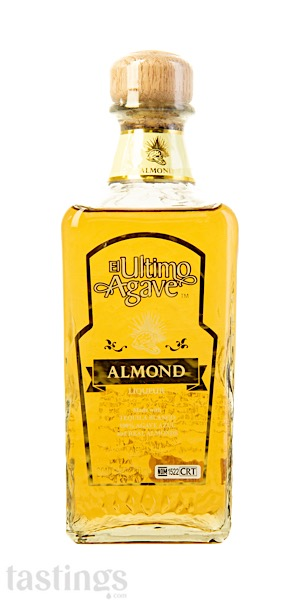

In [69]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
Image('https://www.tastings.com/Product-Images/Spirits/2021/5_1_2021/235087_z.jpg', width=127, height=228)

### More

In [3]:
with open('items_list_liquor_total_wine.pkl', 'rb') as input:
    total_wine_list = pickle.load(input)

In [4]:
total_wine_list[2000]

'https://www.totalwine.com/spirits/vodka/flavored-vodka/raspberry/absolut-raspberri/p/99450750?s=1108&igrules=true'

In [83]:
response = requests.get('https://www.totalwine.com/spirits/bourbon/small-batch-bourbon/winchester-kentucky-straight-bourbon-whiskey/p/219535050?s=1406&igrules=true', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")


In [84]:
soup.find('h1').text #Name

'WINCHESTER KENTUCKY STRAIGHT BOURBON WHISKEY '

In [54]:
soup.find(class_='productImages__30ruxKAu')('img')[0]['src']  #Photo_Link

'https://www.totalwine.com/dynamic/x490,sq/media/sys_master/twmmedia/h49/h5e/13693587816478.png'

In [55]:
soup.find(class_='productInfoContainer__2oSxzsKz')('p')[0].text  #Description

'USA- Pour, sip, and escape with a Los Cabos Margarita. Crafted with the original south-of-the-border recipe using real fruit juice, natural flavors, and silver tequila. Fresh strawberry flavor, full of sweet, ripe notes. Just pour over ice and enjoy!'

In [73]:
for i in range(len(soup.find_all(class_='detailsTableRow__2kp3qVvB'))):
    print(soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text)

BRANDLa Tradicion Los Cabos
COUNTRYUnited States
STATECalifornia
SPIRITS TYPEReady to Drink
SPIRITS STYLETequila Cocktails, Margarita
ABV9%
SKU233024175-1


In [85]:
for i in range(len(soup.find_all(class_='detailsTableRow__2kp3qVvB'))):
    print(soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text)

BRANDWinchester
COUNTRYUnited States
STATEKentucky
SPIRITS TYPEBourbon
SPIRITS STYLESmall Batch Bourbon
ABV45%
TASTERich, Oak, Honey, Balanced
SKU219535050-1


In [76]:
for i in range(len(soup.find_all(class_='detailsTableRow__2kp3qVvB'))):
    if 'SPIRITS STYLE' in soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text:
        category = soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text

In [77]:
category

'SPIRITS STYLETequila Cocktails, Margarita'

In [78]:
for i in range(len(soup.find_all(class_='detailsTableRow__2kp3qVvB'))):
    if 'ABV' in soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text:
        vol = soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text

In [79]:
vol

'ABV9%'

In [61]:
soup.find_all(class_='detailsTableText__1SvcRdYn')

[<div class="detailsTableText__1SvcRdYn"><a anclick="attribute_La Tradicion Los Cabos" href="/spirits/brand/la-tradicion-los-cabos" rel="noopener noreferrer">La Tradicion Los Cabos</a></div>,
 <div class="detailsTableText__1SvcRdYn"><a anclick="attribute_United States" href="/spirits/united-states/c/001016" rel="noopener noreferrer">United States</a></div>,
 <div class="detailsTableText__1SvcRdYn"><a anclick="attribute_California" href="/spirits/california/california/c/001079" rel="noopener noreferrer">California</a></div>,
 <div class="detailsTableText__1SvcRdYn"><a anclick="attribute_Ready to Drink" href="/spirits/ready-to-drink/c/000791" rel="noopener noreferrer">Ready to Drink</a></div>,
 <div class="detailsTableText__1SvcRdYn"><a anclick="attribute_Tequila Cocktails" href="/spirits/tequila-cocktails/tequila-cocktails/c/191034" rel="noopener noreferrer">Tequila Cocktails</a>, <!-- -->Margarita</div>,
 <div class="detailsTableText__1SvcRdYn">9<!-- -->%</div>,
 <div class="detailsTab

In [56]:
soup.find_all(class_='detailsTableText__1SvcRdYn')[0].text  #Brand

'La Tradicion Los Cabos'

In [57]:
soup.find_all(class_='detailsTableText__1SvcRdYn')[1].text   #Country

'United States'

In [58]:
soup.find_all(class_='detailsTableText__1SvcRdYn')[3].text + ' ' +  soup.find_all(class_='detailsTableText__1SvcRdYn')[2].text #Category

'Ready to Drink California'

In [40]:
soup.find_all(class_='detailsTableText__1SvcRdYn')[4].text   #Aroma, flavor

'Medium, Cherry, Pepper, Oak, Mild'

In [44]:
soup.find(id='edlpPrice').text   #Price

'$219.99'

In [5]:
len(total_wine_list)

3700

In [8]:
40 % 20

0

In [9]:
for indx, url in enumerate(total_wine_list[:20]):
    print(indx, url)

0 https://www.totalwine.com/spirits/ready-to-drink/tequila-cocktails/margarita/los-cabos-strawberry-margarita/p/233024175?s=1108&igrules=true
1 https://www.totalwine.com/spirits/ready-to-drink/tequila-cocktails/margarita/los-cabos-spicy-mango-margarita/p/233023175?s=1108&igrules=true
2 https://www.totalwine.com/spirits/deals/tequila/blanco-silver/los-cabos-silver-tequila/p/233715175?s=1108&igrules=true
3 https://www.totalwine.com/spirits/ready-to-drink/tequila-cocktails/margarita/los-cabos-classic-lime-margarita/p/232798175?s=1108&igrules=true
4 https://www.totalwine.com/spirits/ready-to-drink/tequila-cocktails/margarita/los-cabos-peach-margarita/p/233723175?s=1108&igrules=true
5 https://www.totalwine.com/spirits/ready-to-drink/tequila-cocktails/margarita/los-cabos-cucumber-mint-margarita/p/233021175?s=1108&igrules=true
6 https://www.totalwine.com/spirits/deals/vodka/vodka/tower-vodka/p/159399175?s=1108&igrules=true
7 https://www.totalwine.com/spirits/ready-to-drink/frozen-freezable-co

In [10]:
#Scrape more reviews and photos
smaller_headers = ["Name", "Category", "Description", "Country", "Aroma", "Alcohol_Vol", "Photo_Link", "Price"]
features_list = []

for indx, url in enumerate(total_wine_list[:1000]):
    
    if indx % 20 == 0:
        
        time.sleep(20)
    
    else:

        response = requests.get(url, headers=header)

        data = response.text

        soup = BeautifulSoup(data, "html.parser")


        try:
            name = soup.find('h1').text
        except:
            name = np.nan

        category = np.nan
        country = np.nan
        aroma = np.nan
        alcohol_vol = np.nan

        for i in range(len(soup.find_all(class_='detailsTableRow__2kp3qVvB'))):

            if 'SPIRITS STYLE' in soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text:
                category = soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text
            elif 'COUNTRY' in soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text:
                country = soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text
            elif 'TASTE' in soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text:
                aroma = soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text
            elif 'ABV' in soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text:
                alcohol_vol = soup.find_all(class_='detailsTableRow__2kp3qVvB')[i].text


        try:
            description = soup.find(class_='productInfoContainer__2oSxzsKz')('p')[0].text   ##Description
        except:
            description = np.nan


        try:
            photo_link = soup.find(class_='productImages__30ruxKAu')('img')[0]['src']
        except:
            photo_link = np.nan

        try:
            price = soup.find(id='edlpPrice').text
        except:
            price = np.nan




        #Put all features in a dictionary
        drink_dict = dict(zip(smaller_headers, [name, category, description, country, aroma, alcohol_vol, photo_link, price]))

        features_list.append(drink_dict)

df = pd.DataFrame(features_list)

df.to_csv('more_drinks_total_wine_1.csv')
time.sleep(60)
print('Done!')

Done!


In [11]:
df

,Name,Category,Description,Country,Aroma,Alcohol_Vol,Photo_Link,Price
0,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
945,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948,Please verify you are a human,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
response = requests.get('https://www.totalwine.com/spirits/bourbon/small-batch-bourbon/winchester-kentucky-straight-bourbon-whiskey/p/219535050?s=1406&igrules=true', headers=header)

data = response.text

soup = BeautifulSoup(data, "html.parser")

soup

<!DOCTYPE html>
 <html lang="en"> <head> <meta charset="utf-8"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>Total Wine &amp; More - Access to this page has been denied.</title> <link href="https://fonts.googleapis.com/css?family=Roboto&amp;display=swap" rel="stylesheet"/> <style> html, body { margin: 0; padding: 0; font-family: 'Roboto', sans-serif; color: #000; } a { color: #c5c5c5; text-decoration: none; } .container { align-items: center; display: flex; flex: 1; justify-content: space-between; flex-direction: column; height: 100%; } .container > div { width: 100%; display: flex; justify-content: center; } .container > div > div { display: flex; width: 80%; } .customer-logo-wrapper { padding: 0px; background-color: #811F08; } .customer-logo { padding: 16px 0px 16px 0px; } .page-title-wrapper { flex-grow: 2; } .page-title { flex-direction: column-reverse; } .content-wrapper { flex-grow: 5; } .content { flex-direction: column; } .page-footer-wrapper { 